# Regresión lineal con polinomios

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
data = pd.read_csv(url)
data.head()

# Reemplazamos los valores nulos de la columna 'horsepower' por la media
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())
print(data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


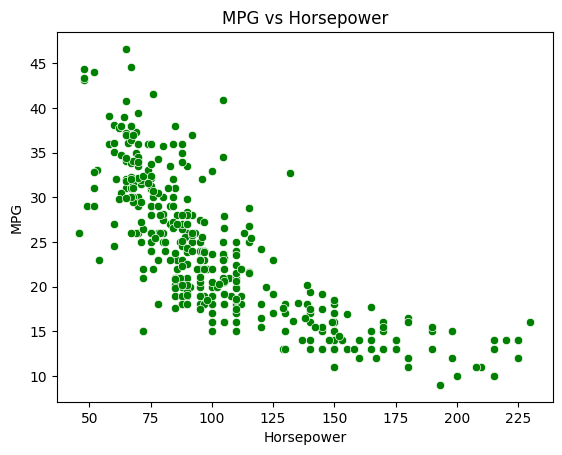

In [2]:
# Graficamos la relación entre las columnas 'mpg' y 'horsepower'
sns.scatterplot(x='horsepower', y='mpg', data=data, color='green')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Seleccionamos las columnas 'horsepower' y 'mpg'
X = data[['horsepower']].dropna()
y = data['mpg'].dropna()

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Agregamos el cuadrado de la columna 'horsepower'
X_train['horsepower2'] = X_train['horsepower']**2
X_test['horsepower2'] = X_test['horsepower']**2

In [5]:
# Creamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

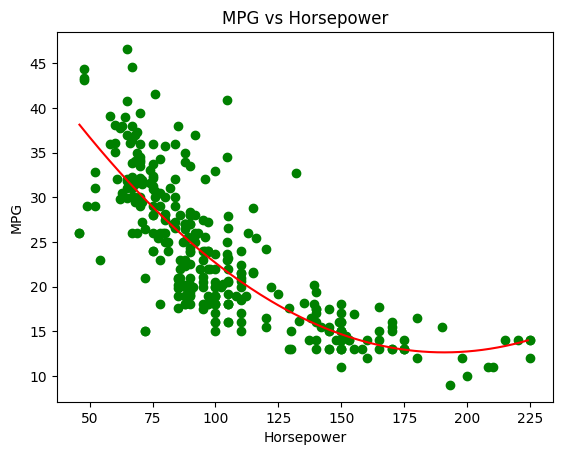

In [6]:
import numpy as np

# Mostramos la gráfica de la regresión
plt.scatter(X_train['horsepower'], y_train, color='green')

# Creamos un rango de valores para 'horsepower'
x_labels = np.arange(X_train["horsepower"].min(), X_train["horsepower"].max(), 1)
y_labels = model.predict(pd.DataFrame({'horsepower': x_labels, 'horsepower2': x_labels**2}))
plt.plot(x_labels, y_labels, color='red')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower')
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

y_pred = model.predict(X_test)

# Calcula el MAE (Mean Absolute Error) del modelo   
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Calcula el MSE (Mean Squared Error) del modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Calcula el RMSE (Root Mean Squared Error) del modelo
rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse}')

# Calcula el R2 del modelo
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

# Calcula el R2 ajustado del modelo
n = X_test.shape[0]
p = X_test.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2 ajustado: {r2_adj}')

MAE: 2.8923510850211787
MSE: 13.760855128148346
RMSE: 3.709562659957147
R2: 0.7440623896917425
R2 ajustado: 0.7374146595538658


In [8]:
# Vemos los coeficientes de la regresión en df
df = pd.DataFrame(model.coef_, index=X_train.columns, columns=['Coeficiente'])
df.loc['Intercept'] = model.intercept_
print(df)

             Coeficiente
horsepower     -0.463831
horsepower2     0.001216
Intercept      56.885323


In [9]:
def metricas(model, X_test):
    y_pred = model.predict(X_test)

    # Calcula el MAE (Mean Absolute Error) del modelo   
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE: {mae}')

    # Calcula el MSE (Mean Squared Error) del modelo
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE: {mse}')

    # Calcula el RMSE (Root Mean Squared Error) del modelo
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f'RMSE: {rmse}')

    # Calcula el R2 del modelo
    r2 = r2_score(y_test, y_pred)
    print(f'R2: {r2}')

    # Calcula el R2 ajustado del modelo
    n = X_test.shape[0]
    p = X_test.shape[1]
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f'R2 ajustado: {r2_adj}')

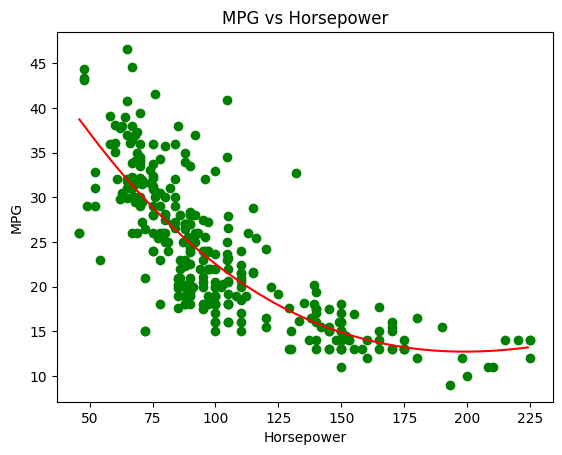

MAE: 2.89848996610492
MSE: 13.813374257349674
RMSE: 3.716634802795356
R2: 0.7430855884466104
R2 ajustado: 0.7329442300958188
             Coeficiente
horsepower     -0.559171
horsepower2     0.002009
horsepower3    -0.000002
Intercept      60.384244


In [10]:
# Probamos hacer un modelo que tenga tanto el valor de 'horsepower', cuadrada y cúbica
X_train['horsepower3'] = X_train['horsepower']**3
X_test['horsepower3'] = X_test['horsepower']**3

model = LinearRegression()
model.fit(X_train, y_train)

# Vemos la gráfica de la regresión
plt.scatter(X_train['horsepower'], y_train, color='green')

x_labels = np.arange(X_train["horsepower"].min(), X_train["horsepower"].max(), 1)
y_labels = model.predict(pd.DataFrame({'horsepower': x_labels, 'horsepower2': x_labels**2, 'horsepower3': x_labels**3}))
plt.plot(x_labels, y_labels, color='red')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower')
plt.show()

metricas(model, X_test)

# Vemos los coeficientes de la regresión en df
df = pd.DataFrame(model.coef_, index=X_train.columns, columns=['Coeficiente'])
df.loc['Intercept'] = model.intercept_
print(df)


## Regularizaciones

En particular, la regularización se aplica para evitar el sobreajuste de los datos, especialmente cuando hay una gran varianza entre el rendimiento del conjunto de entrenamiento y el de prueba. Con la regularización, el número de características utilizadas en el entrenamiento se mantiene constante, pero la magnitud de los coeficientes se reduce.

<img src="../imgs/bias.jpg">

Por tanto tenemos dos formas de regularización.

#### Ridge

¡Claro! Aquí tienes una explicación sencilla sobre Ridge y Lasso para un grupo de introducción a machine learning:

---

### Ridge Regression
Ridge Regression agrega una penalización a la suma de los coeficientes del modelo. Esto se hace sumando una term negativa (regularización) al cálculo del error cuadrático medio (MSE) que el modelo intenta minimizar.

La fórmula para Ridge Regression es:
$ \text{MSE} + \alpha \sum_{i=1}^{n} \beta_i^2 $

Donde:
- $\text{MSE}$ es el error cuadrático medio.
- $\alpha$ es un parámetro que controla la cantidad de penalización. Si $\alpha$ es 0, Ridge Regression es igual a la regresión lineal estándar.
- $\beta_i$ son los coeficientes de los términos del modelo.

¿Cuándo usar Ridge Regression?
- Cuando tienes muchos parámetros en tu modelo.
- Cuando quieres evitar el sobreajuste.
- Cuando tus datos tienen multicolinealidad (cuando los features están altamente correlacionados).


### Lasso Regression
Lasso Regression agrega una penalización a la suma de los valores absolutos de los coeficientes del modelo. La fórmula para Lasso Regression es:
$ \text{MSE} + \alpha \sum_{i=1}^{n} |\beta_i| $

Donde:
- $\text{MSE}$ es el error cuadrático medio.
- $\alpha$ es un parámetro que controla la cantidad de penalización.
- $|\beta_i|$ son los valores absolutos de los coeficientes de los términos del modelo.

¿Cuándo usar Lasso Regression?
- Cuando quieres seleccionar features. Lasso puede llevar algunos coeficientes exactamente a cero, eliminando así features innecesarios.
- Cuando quieres simplificar tu modelo.
- Cuando tus datos tienen multicolinealidad y deseas obtener un modelo más interpretable.

<img src="../imgs/regularization.png">

### Comparación entre Ridge y Lasso

1. **Penalización**:
   - Ridge usa $\sum_{i=1}^{n} \beta_i^2$ (penalización L2).
   - Lasso usa $\sum_{i=1}^{n} |\beta_i|$ (penalización L1).

2. **Impacto en los Coeficientes**:
   - Ridge reduce los coeficientes pero no los lleva a cero.
   - Lasso puede llevar algunos coeficientes exactamente a cero, eliminando features.

3. **Uso Principal**:
   - Ridge es útil cuando todos los features son relevantes y no quieres eliminarlos.
   - Lasso es útil para la selección de features y simplificar el modelo.


<img src="../imgs/optimum_params.jpg">

# Múltiples polinomios

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop(["mpg", "name"], axis=1)
y = data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Creamos un pipeline con un escalador, un transformador polinómico y un modelo de regresión Ridge

# Numericas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
# Categoricas
categorical_features = X.select_dtypes(include=['object']).columns

# Creamos un pipeline con un escalador, un transformador polinómico y un modelo de regresión Ridge
# Definimos que el escalador y el transformador polinómico se apliquen a todas las columnas numéricas
# Definimos que el modelo de regresión Ridge se aplique a todas las columnas
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(), categorical_features)
        ]
    )),
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
])

# Definimos los parámetros a buscar
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],
    'model__alpha': [0.1, 1, 10, 100]
}

In [13]:
# Creamos el modelo de búsqueda
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         Index(['origin'], dtype='object'))])),
                                       ('poly', PolynomialFeatures()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.1, 1, 10, 100],
                         'poly__degree': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [14]:
# Obtenemos el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f'Mejor modelo: {best_model}')
print(f'Mejores parámetros: {best_params}')

Mejor modelo: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['origin'], dtype='object'))])),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', Ridge(alpha=100))])
Mejores parámetros: {'model__alpha': 100, 'poly__degree': 3}


MAE: 1.7027936747682666
MSE: 5.084635747774217
RMSE: 2.2549136896507185
R2: 0.9054310571214929
R2 ajustado: 0.896236854341638


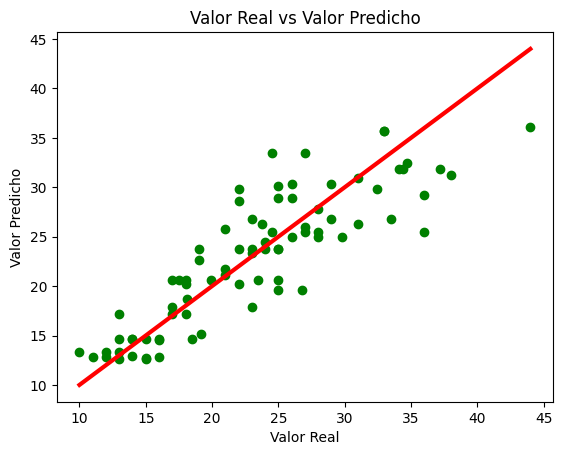

In [15]:
# Calculamos las métricas del mejor modelo
metricas(best_model, X_test)

# Hacemos una gráfica con el valor real y el predicho
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=3)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Valor Real vs Valor Predicho')
plt.show()

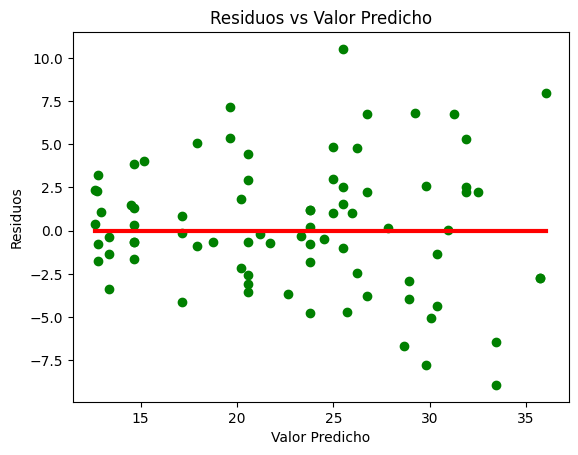

In [16]:
# Hacemos gráficas de los residuos
residuos = y_test - y_pred
plt.scatter(y_pred, residuos, color='green')
plt.plot([y_pred.min(), y_pred.max()], [0, 0], color='red', linewidth=3)
plt.xlabel('Valor Predicho')
plt.ylabel('Residuos')
plt.title('Residuos vs Valor Predicho')
plt.show()

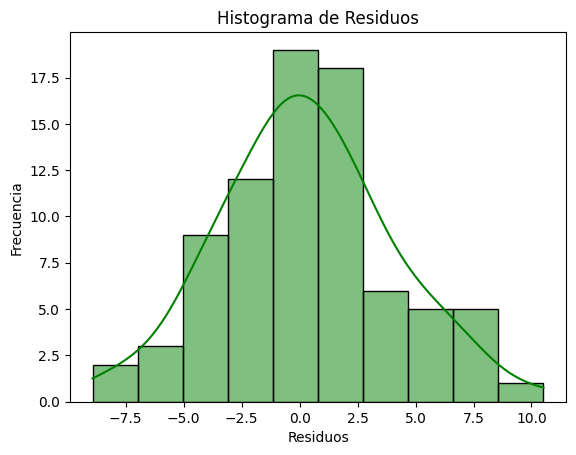

In [17]:
# Hacemos un histograma de los residuos
sns.histplot(residuos, color='green', kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

In [22]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
198,4,91.0,53.0,1795,17.4,76,japan
396,4,120.0,79.0,2625,18.6,82,usa
33,6,232.0,100.0,2634,13.0,71,usa
208,8,318.0,150.0,3940,13.2,76,usa
93,8,318.0,150.0,4237,14.5,73,usa
...,...,...,...,...,...,...,...
249,8,260.0,110.0,3365,15.5,78,usa
225,6,250.0,110.0,3520,16.4,77,usa
367,4,112.0,88.0,2605,19.6,82,usa
175,4,90.0,70.0,1937,14.0,75,europe


In [30]:
# Hacer un carro prueba
carro_prueba = pd.DataFrame({
    'cylinders': [8],
    'displacement': [307],
    'horsepower': [130],
    'weight': [3504],
    'acceleration': [12],
    'model_year': [70],
    'origin': "usa",
})

# Predecir el valor de 'mpg' del carro de prueba
best_model.predict(carro_prueba)

array([15.49816784])